In [ ]:
RETAILNOVA ANALYTICS PROJECT
DATA CLEANING, EXPLORATION, FEATURE ENGINEERING

In [ ]:
## 1. Project Overview:
# This notebook documents the end-to-end data preparation workflow for the RetailNova analytics project.
# The objective is to transform raw transactional data into clean, reliable, and analytics-ready datasets suitable for :
    # SQL-based business analysis
    # Power BI data modeling and dashboarding
    # Executive-level decision support

In [ ]:
# The notebook follows a structured approach:
    # 1. Data Loading
    # 2. Exploratory Data Analysis (EDA)
    # 3. Data Cleaning & Standardization
    # 4. Data Quality Validation
    # 5. Feature Engineering
    # 6. Business-Level Sanity Checks
    # Export of Cleaned Data
    

In [27]:
#importing needed Libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
## 2. Data Loading:
# In this section, all raw datasets are loaded from the source directory.
# The data sets are stored in a dictionary for easy iteration and consistency across transformation steps.

In [28]:
# Base Path for Raw Data Files
raw_path = r'D:\DA MATERIAL\Retail_Sales_Capstone\Data\Raw'

# File Mapping
files = {
    'customers':'customers.csv',
    'products':'products.csv',
    'stores':'stores.csv',
    'returns':'returns.csv',
    'salesdata':'sales_data.csv'}

# Load all raw datasets into Dictionary
data = { name: pd.read_csv(f"{raw_path}\\{file}") for name,file in files.items()}

In [ ]:
## 3. Initial Data Exploration (EDA):
# Exploratory Data Analysis (EDA) is performed to understand dataset structure, data types,missing values and potential data quality issues before 
# applying cleaning.

In [29]:
# Data Exploration
# Perform basic exploratory data analysis on the datasets
def explore_data(df,name):
    name=name.upper() if name else "DATASET"
    print(f"\n {'='*70}")
    print(f"\n Exploring Dataset : {name}")
    print(f"\n {'='*70}")

    #Shape - to identify number of rows and columns of the dataset
    print("\n Shape (Rows,Columns):",df.shape)

    #Columns - to know the columns
    print("\n Column names:",list(df.columns))

    #info() - to know the count of non-null values, memory usage and data types
    print("\n Data Information: Data Types & NOn-Null counts")
    df.info()

    # Sample data - displays the sample rows to understand the format of the data
    print("\n Sample Records (Head):",df.head())
    print("\n Sample Records (Tail):", df.tail())

    # describe() - Shows the statistical summary of the data
    print("\n Statistical Summary (Numerical):", df.describe())
    print("\n Statistical Summary (categorical):", df.describe(include=['object','string']))

    #isna()/isnull() - to know the count of null or blank values
    print("\n Missing Values:", df.isnull().sum())
    
    # duplicated() - to check the duplicate records in the data
    dup_count = df.duplicated().sum()
    print(f"\n Duplicate Row count:{dup_count}")

    if dup_count > 0:
        print("\n Sample duplicate Records are:")
        print(df[df.duplicated()].head())

In [30]:
# Applying exploration to all datasets
for name,df in data.items():
    explore_data(df,name)



 Exploring Dataset : CUSTOMERS


 Shape (Rows,Columns): (816, 7)

 Column names: ['customer_id', 'first_name', 'last_name', 'gender', 'age', 'signup_date', 'region']

 Data Information: Data Types & NOn-Null counts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  816 non-null    object 
 1   first_name   816 non-null    object 
 2   last_name    816 non-null    object 
 3   gender       816 non-null    object 
 4   age          776 non-null    float64
 5   signup_date  816 non-null    object 
 6   region       816 non-null    object 
dtypes: float64(1), object(6)
memory usage: 44.8+ KB

 Sample Records (Head):   customer_id first_name last_name  gender   age signup_date region
0       C0000    Patrick    Morgan    Male  18.0   7/11/2024  South
1       C0001       Eric       Lee   Other  36.0   9/20/2020   East
2       C0002     T

In [ ]:
## 4. Data Cleaning & Standardization:
# This section documents all data cleaning steps applied to the raw datasets to ensure consistency, accuracy and usability for analysis.

In [ ]:
# 4.1 Date Standardization
# All date columns are converted to datetime format and normalized to remove time components.

In [31]:
# Data Cleaning
# Convert date columns to date time format
date_columns= { 'salesdata':['order_date'],
               'returns':['return_date'],
               'customers':['signup_date']}
for table,cols in date_columns.items():
    for col in cols:
        data[table][col]=(pd.to_datetime(data[table][col],errors='coerce').dt.normalize())

# Verifying date column conversion
for name,df in data.items():
    date_cols=[col for col in df.columns if 'date' in col.lower()]
    if date_cols:
        print(f"\n {name.upper()}           Date Columns:")
        print(df[date_cols].dtypes)


 CUSTOMERS           Date Columns:
signup_date    datetime64[ns]
dtype: object

 RETURNS           Date Columns:
return_date    datetime64[ns]
dtype: object

 SALESDATA           Date Columns:
order_date    datetime64[ns]
dtype: object


In [ ]:
# Missing Values Analysis Before Cleaning
# The percentage of missing values was calculated before cleaning to quantitatively validate improvements in data completeness.

In [32]:
def missing_value_summary(df,dataset_name):
    summary = (df.isnull().mean().mul(100).round(2).reset_index())
    summary.columns=['Column',"Missing_Percentage"]
    summary['Dataset']=dataset_name
    return summary
before_missing_all=pd.concat([missing_value_summary(df,name) for name ,df in data.items()],ignore_index=True)
before_missing_all

,Column,Missing_Percentage,Dataset
0,customer_id,0.00,customers
1,first_name,0.00,customers
2,last_name,0.00,customers
3,gender,0.00,customers
4,age,4.90,customers
5,signup_date,0.00,customers
6,region,0.00,customers
7,product_id,0.00,products
8,product_name,0.00,products
9,category,0.00,products


In [ ]:
# 4.2 Handling Missing values
# Missing values were addressed based on business logic rather than blank values.

In [33]:
# Replace Missing customers age with Median
data['customers']['age']=data['customers']['age'].fillna(data['customers']['age'].median())

# Replacing Missing brand with Unknown
data['products']['brand']=data['products']['brand'].fillna('Unknown')

# Identifying Instore sales with missing store_id's
Instore_mask= ((data['salesdata']['sales_channel']=='In-Store')&(data['salesdata']['store_id'].isnull()))

# Replace missing In-store store_id with placeholder 'S000'
data['salesdata'].loc[Instore_mask,'store_id']='S000'

# Identifying Onine sales with missing store_id's
Online_mask= (( data['salesdata']['sales_channel']=='Online')&(data['salesdata']['store_id'].isnull()))

# Since Online sales are not associated with Physical stores, the store_id is replaced with 'ONLINE'
data['salesdata'].loc[Online_mask,'store_id']='ONLINE'

# Any remaining missing store_id's present
Unknown_mask=data['salesdata']['store_id'].isnull()
data['salesdata'].loc[Unknown_mask,'store_id']='UNKNOWN'

# Flag Unknown .Placeholder Stores
data['salesdata'].loc[:,'is_unknown_store']=(data['salesdata']['store_id'].isin(['S000','UNKNOWN'])).astype(int)

In [ ]:
# 4.3 Standardization & Formatting
# Standardize categorical fields for consistency across reports and dashboards. 

In [34]:
# To ensure accurate brand formatting i.e. BrandA -> Brand A
cols_to_clean= ['product_name','brand']
for col in cols_to_clean:
    data['products'][col]=data['products'][col].str.replace(r'Brand([A-Z])',r'Brand \1',regex=True).str.strip()

In [ ]:
## 5. Data Quality Validation
# Validate that cleaning steps improved data quality without introducing inconsistencies. 

In [35]:
row_counts_before={ name:df.shape[0] for name, df in data.items()}

data['customers']=data['customers'].drop_duplicates(subset=['customer_id'])
data['products']=data['products'].drop_duplicates(subset=['product_id'])
data['stores']=data['stores'].drop_duplicates(subset=['store_id'])
data['returns']=data['returns'].drop_duplicates(subset=['return_id'])
data['salesdata']=data['salesdata'].drop_duplicates(subset=['order_id'])

row_counts_after={name:df.shape[0] for name, df in data.items()}

In [36]:
row_count_validation=(pd.DataFrame({'Dataset': row_counts_before.keys(),
                                    'Rows_Before':row_counts_before.values(),
                                    'Rows_After':row_counts_after.values()}))
row_count_validation['Duplicates_Removed']=(row_count_validation['Rows_Before']-row_count_validation['Rows_After'])
row_count_validation

,Dataset,Rows_Before,Rows_After,Duplicates_Removed
0,customers,816,800,16
1,products,1224,1200,24
2,stores,61,60,1
3,returns,204,200,4
4,salesdata,3060,3000,60


In [ ]:
## Feature Engineering:
# Derived metrics were created to support business analysis and dashboarding. 
# These features enable profitability, return behavior and customer value analysis.

In [37]:
# Feature Engineering
# Sales Metrics
# Merge Products cost price into salesdata to calculate profit
data['salesdata']=data['salesdata'].merge(data['products'][['product_id','cost_price']],on='product_id',how='left')

# Calculate Net revenue
data['salesdata']['net_revenue']=(data['salesdata']['quantity']*data['salesdata']['unit_price']*(1-data['salesdata']['discount_pct']/100))

# Calculate Cost Amount
data['salesdata']['cost_amount']=(data['salesdata']['quantity']*data['salesdata']['cost_price'])

# Calculate Profit
data['salesdata']['profit']=(data['salesdata']['net_revenue']-data['salesdata']['cost_amount'])

# Calculate Profit Margin Percentage
data['salesdata']['profit_margin_pct']=np.where(data['salesdata']['net_revenue']>0,(data['salesdata']['profit']/data['salesdata']['net_revenue'])*100,0)

In [38]:
# Return Metrics 
# To ensure order id non duplication, aggregate returns to one row per order_id
returns_summary = (data['returns'].groupby('order_id',as_index=False).agg(first_return_date=('return_date','min')))

returns_summary['return_flag']=1

# Merge returns into salesdata
data['salesdata']=data['salesdata'].merge(returns_summary,on='order_id',how='left')

# Orders with no return
data['salesdata']['return_flag']=data['salesdata']['return_flag'].fillna(0).astype(int)

# Calculate return lag days
data['salesdata']['return_lag_days']=(data['salesdata']['first_return_date']-data['salesdata']['order_date']).dt.days

# For non-returned orders
data['salesdata']['return_lag_days']=data['salesdata']['return_lag_days'].where(data['salesdata']['return_lag_days']>=0)

In [39]:
# Monetary Columns round only if present
sales_money_cols=['unit_price','cost_price','net_revenue','cost_amount','profit','total_amount']
sales_money_cols=[col for col in sales_money_cols if col in data['salesdata'].columns]

# Percentage Columns
sales_pct_cols=['profit_margin_pct','discount_pct']
sales_pct_cols=[col for col in sales_pct_cols if col in data['salesdata'].columns]

# Applying rounding 
data['salesdata'][sales_money_cols]=data['salesdata'][sales_money_cols].round(2)
data['salesdata'][sales_pct_cols]=data['salesdata'][sales_pct_cols].round(2)

In [40]:
# Products Data
# calculate profit per unit
data['products']['unit_profit']=(data['products']['unit_price']-data['products']['cost_price'])

# Round product numeric columns for clean reports
data['products'][['unit_price','cost_price','unit_profit']]=(data['products'][['unit_price','cost_price','unit_profit']]).round(2)
data['products'][['margin_pct']]=(data['products'][['margin_pct']]).round(2)

In [41]:
# Customers data
# Create age group for customer segmentation
bins = [0,18,25,35,45,60,120]
labels = ['<=18','18-25','26-35','36-45','46-60','60+']
data['customers'].loc[:,'age_group']=pd.cut(data['customers']['age'], bins=bins, labels=labels, include_lowest=True)

# Create Customer tenure in days
anaylsis_date=data['salesdata']['order_date'].max()
data['customers'].loc[:,'tenure_days']=(anaylsis_date - data['customers']['signup_date']).dt.days

# Convert tenure days to years
data['customers'].loc[:,'tenure_years']=(data['customers']['tenure_days']/365.25).round(1)

In [42]:
# Stores Data
#Flag Store Type
data['stores']['is_flagship']=(data['stores']['store_type']=='Flagship').astype(int)

# Group operating cost into ranges for easy comparision
data['stores']['operating_cost_band']=pd.cut(data['stores']['operating_cost'],bins =[0,5000,15000,30000,100000],
                                             labels=['Low','Medium','High','Very High'])

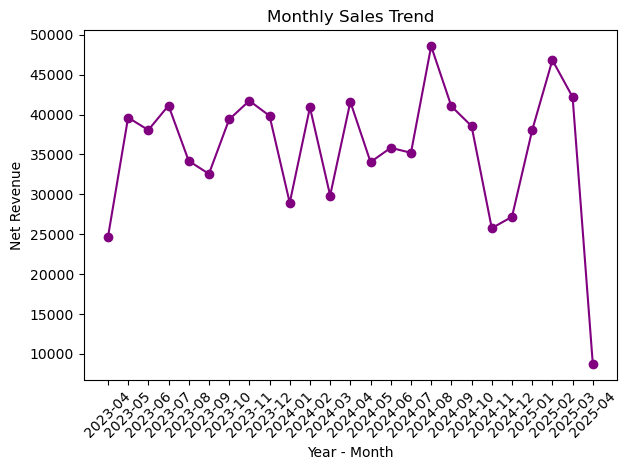

In [43]:
# Basic EDA & Business Insights
# Monthly Sales Trend
df=data['salesdata']
monthly_sales=(df.groupby(df['order_date'].dt.to_period('M'))['net_revenue'].sum().reset_index())
monthly_sales['order_date']=monthly_sales['order_date'].astype(str)
monthly_sales=monthly_sales.sort_values('order_date')
plt.figure()
plt.plot(monthly_sales['order_date'],monthly_sales['net_revenue'],color='purple',linestyle='-',marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Year - Month')
plt.ylabel('Net Revenue')
plt.tight_layout()
plt.show()

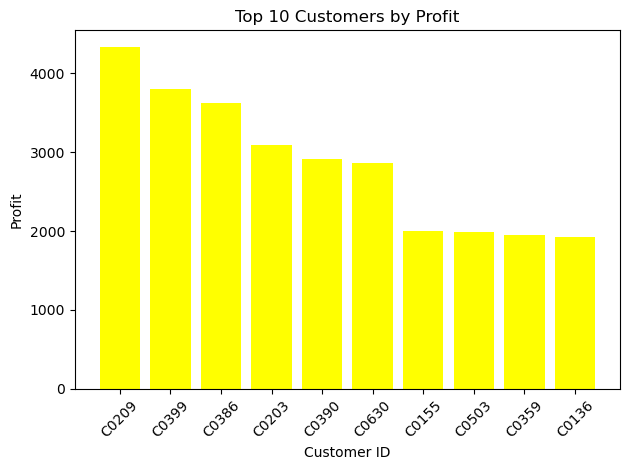

In [46]:
# Top 10 Customers by Revenue
top_customers=(data['salesdata'].groupby('customer_id',as_index=False)['profit'].sum().sort_values(by='profit', ascending=False).head(10))
plt.figure()
plt.bar(top_customers['customer_id'],top_customers['profit'],color='yellow')
plt.xticks(rotation=45)
plt.title('Top 10 Customers by Profit')
plt.xlabel('Customer ID')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

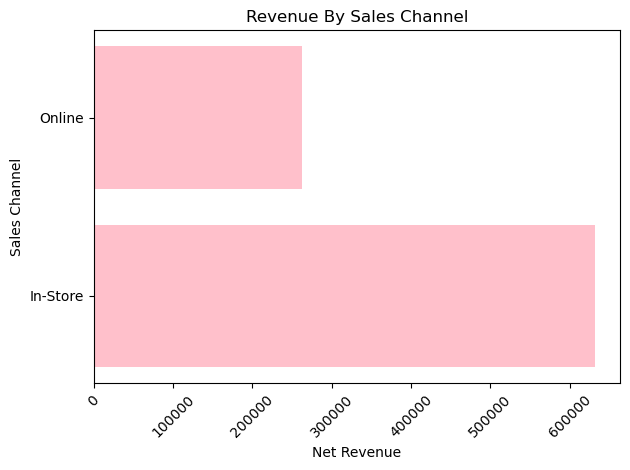

In [47]:
# Revenue by Sales Channel
channel_sales=(data['salesdata'].groupby('sales_channel',as_index=False)['net_revenue'].sum())
plt.barh(channel_sales['sales_channel'],channel_sales['net_revenue'],color='pink')
plt.xticks(rotation=45)
plt.title('Revenue By Sales Channel')
plt.xlabel('Net Revenue')
plt.ylabel('Sales Channel')
plt.tight_layout()
plt.show()                                      

In [ ]:
## Save Cleaned Data
# The cleaned and validated data sets were saved as CSV files to be used for SQL analysis and Power BI reporting.

In [26]:
# base path for cleaned data files
clean_path = r'D:\DA MATERIAL\Retail_Sales_Capstone\Data\Cleaned'

# Create the folder if does not exist
os.makedirs(clean_path,exist_ok=True)

# export all cleaned Dataframes
for name,df in data.items():
    file_path= os.path.join(clean_path,f"{name}_cleaned.csv")
    df.to_csv(file_path,index=False)
print("\n Data Cleaning and Feature Engineering completed Successfully")


 Data Cleaning and Feature Engineering completed Successfully
